In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22243 sha256=c1e48e5c2937dd4f3706289598eeb148f972353ef03f77529f491993f158b1c7
  Stored in directory: C:\Users\SAINATH\AppData\Local\pip\Cache\wheels\04\98\cc\2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
  Created wheel for multitasking: filename=multitasking-0.0.9-cp36-none-any.whl size=6639 sha256=7c20b68ef98a16fad9e5956e88acccc3d5e10bc635729c0af9a597a27a89dfaa
  Stored in directory: C:\Users\SAINATH\AppData\Local\pip\Cache\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking
  Found existing installation: lxml 4.1.1
    Uninstalling lxml-4.1.1:
      Successfully uninstalled lxml-4.1.1


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [65]:
# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [66]:
df = pdr.get_data_yahoo('^NSEI', '2000-01-01', '2021-01-01')
df = df.dropna()
df = df.iloc[:,:4]
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


In [67]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [68]:
import numpy as np
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [69]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [70]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [71]:
import pandas as pd
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.0016774302069193297]
1,High,[0.0002866807563478619]
2,Low,[-4.410978390808067e-05]
3,Close,[0.000999058520857889]
4,S_10,[0.00043498260793048405]
5,Corr,[9.878798794221172e-06]
6,RSI,[0.00072423177640988]
7,Open-Close,[0.0032608218145178895]
8,Open-Open,[0.00030881945359245304]


In [72]:
probability = model.predict_proba(X_test)
print(probability)

[[0.48520445 0.51479555]
 [0.44816969 0.55183031]
 [0.43545873 0.56454127]
 ...
 [0.46814196 0.53185804]
 [0.47140631 0.52859369]
 [0.51779459 0.48220541]]


In [73]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.48520445 0.51479555]
 [0.44816969 0.55183031]
 [0.43545873 0.56454127]
 ...
 [0.46814196 0.53185804]
 [0.47140631 0.52859369]
 [0.51779459 0.48220541]]


In [74]:
print(metrics.confusion_matrix(y_test, predicted))

[[138 295]
 [152 384]]


In [75]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.48      0.32      0.38       433
           1       0.57      0.72      0.63       536

    accuracy                           0.54       969
   macro avg       0.52      0.52      0.51       969
weighted avg       0.53      0.54      0.52       969



In [76]:
print(model.score(X_test,y_test))

0.5386996904024768


In [77]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.52012384 0.49535604 0.49845201 0.56037152 0.52012384 0.54798762
 0.52321981 0.54179567 0.51083591 0.48606811]
0.5204334365325077


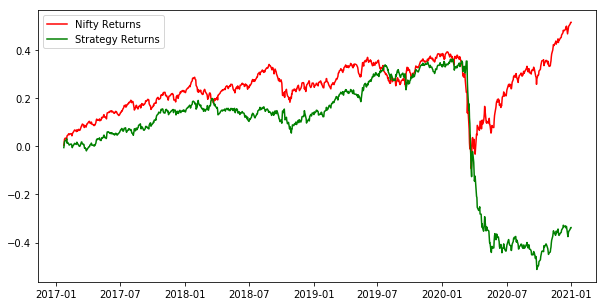

In [64]:
df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()